## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

import matplotlib.pyplot as plt 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Q.1.Glass data

## Importing Data

In [3]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A239-1DCD

 Directory of C:\Users\HP\Documents\EXCELR ASSIGNMENTS\KNN Assignment

12-02-2023  16:08    <DIR>          .
12-02-2023  16:08    <DIR>          ..
12-01-2023  02:29    <DIR>          .ipynb_checkpoints
05-12-2022  10:26            10,053 glass.csv
12-02-2023  16:08           183,262 KNN Assignment.ipynb
05-12-2022  10:26               550 problem_statement(Glass).txt
05-12-2022  10:25                62 Problem_Statement(Zoo).txt
05-12-2022  10:26             4,600 Zoo.csv
               5 File(s)        198,527 bytes
               3 Dir(s)  147,124,625,408 bytes free


In [4]:
glass=pd.read_csv('glass.csv')

In [5]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


## EDA

In [6]:
glass.shape

(214, 10)

In [7]:
glass.Type.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [8]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [11]:
glass.duplicated().sum()

1

In [12]:
glass=glass.drop_duplicates()

In [13]:
 glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [14]:
glass.shape

(213, 10)

## Correlation Matrix

In [15]:
glass.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<AxesSubplot:>

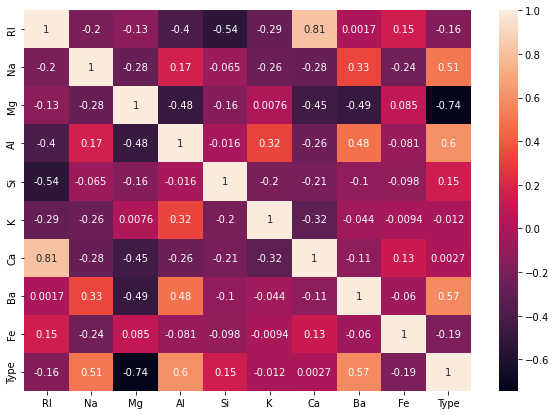

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(glass.corr(),annot=True)

## Splitting Data into input and output variable

In [17]:
array=glass.values
X = array[:, 0:-1]
Y = array[:, -1]

In [18]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [19]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

## Normalizing

In [21]:
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)
X

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

## Training and Testing Data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [23]:
x_train.shape , y_train.shape

((170, 9), (170,))

In [24]:
x_test.shape, y_test.shape

((43, 9), (43,))

## Finding the best value of k

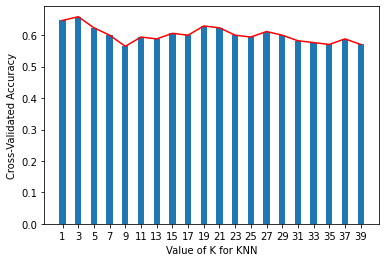

In [25]:
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [26]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
1,3,0.658824
0,1,0.647059
9,19,0.629412
10,21,0.623529
2,5,0.623529
13,27,0.611765
7,15,0.605882
11,23,0.600000
8,17,0.600000
3,7,0.600000


## Build final model

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.7209302325581395

## Confusion Matrix

In [28]:
con_matrix=confusion_matrix(y_test, pred)
con_matrix

array([[11,  0,  1,  0,  0,  0],
       [ 3, 10,  1,  1,  0,  0],
       [ 2,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0],
       [ 0,  1,  0,  1,  1,  1],
       [ 1,  0,  0,  0,  0,  7]], dtype=int64)

## Classification Report

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         1.0       0.65      0.92      0.76        12
         2.0       0.91      0.67      0.77        15
         3.0       0.00      0.00      0.00         2
         5.0       0.50      1.00      0.67         2
         6.0       1.00      0.25      0.40         4
         7.0       0.88      0.88      0.88         8

    accuracy                           0.72        43
   macro avg       0.66      0.62      0.58        43
weighted avg       0.78      0.72      0.71        43



### At k=3, it gives the maximum accuracy of 72.09%.

# Q.2.Zoo data

## Importing Data

In [30]:
Zoo=pd.read_csv('Zoo.csv')

In [29]:
Zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## EDA

In [30]:
Zoo.shape

(101, 18)

In [31]:
Zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [32]:
Zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [33]:
Zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [34]:
Zoo.duplicated().sum()

0

In [35]:
Zoo.type.value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [36]:
Zoo["animal name"].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [37]:
Zoo=Zoo.drop(columns=["animal name"],axis=1)

In [38]:
Zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [39]:
Zoo.shape

(101, 17)

## Splitting Data into input and output variable

In [40]:
array=Zoo.values
X = array[:, 0:-1]
Y = array[:, -1]

In [41]:
X

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0]], dtype=int64)

In [42]:
Y

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2, 4, 4, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 7, 4, 1, 1, 3, 7, 2, 2, 3, 7, 4, 2, 1, 7, 4, 2,
       6, 5, 3, 3, 4, 1, 1, 2, 1, 6, 1, 7, 2], dtype=int64)

## Normalizing

In [43]:
scaler = MinMaxScaler()
scaler.fit(X)

X=scaler.transform(X)

## Splitting Training and Testing Data

In [44]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [45]:
x_train.shape,y_train.shape

((80, 16), (80,))

In [46]:
x_test.shape,y_test.shape

((21, 16), (21,))

# Finding the best value of k

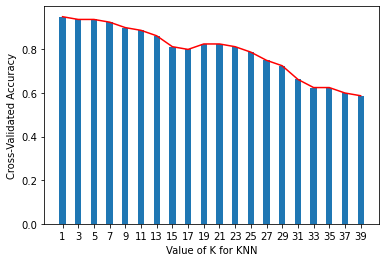

In [47]:
# choose k between 1 to 41
k_range = [2*i+1 for i in range(0,20)]
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores,color="red")

plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [48]:
scores=pd.DataFrame()
scores["K_values"]=k_range
scores["Scores"]=k_scores
scores.sort_values(["Scores"],ascending=False)

,K_values,Scores
0,1,0.9500
2,5,0.9375
1,3,0.9375
3,7,0.9250
4,9,0.9000
5,11,0.8875
6,13,0.8625
9,19,0.8250
10,21,0.8250
7,15,0.8125


In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
accuracy_score(y_test,pred)

0.9523809523809523

## Confusion Matrix

In [50]:
con_matrix=confusion_matrix(y_test, pred)
con_matrix

array([[6, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 2]], dtype=int64)

## Classification Report

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.81      0.83      0.82        21
weighted avg       0.91      0.95      0.93        21



### At k=1, it gives the maximum accuracy of 95.23%.